In [36]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
pip install tabula

  Created wheel for tabula: filename=tabula-1.0.5-py3-none-any.whl size=10601 sha256=671448a921ce8f80fbe1e8b9abec2ec399c9077dba05f2bdd8d3bbab703fdf7e
  Stored in directory: c:\users\anish\appdata\local\pip\cache\wheels\0c\6b\25\f7f32d9ab1a2fdeeb40b83f50b19f8c42fbb76a189cdff8884
Successfully built tabula
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Importing the dataset
DATASET_COLUMNS=['id','tweet_text','tweet_created_at','tweet_intent']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('C:\\Users\\anish\\Desktop\\Tweet_new.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,id,tweet_text,tweet_created_at,tweet_intent
73137,1374876.0,@BittorentArmy Wow! This is real big. Check ou...,2022-08-10T08:03:58.000Z,Community
57310,1331448.0,@tangerinenft @DininhoNFT @cokechen12 If you a...,2022-08-09T16:28:51.000Z,Giveaway
1553,1215610.0,@ian_turl @1goonrich Run and Check \n@CryptoAp...,2022-08-06T16:45:26.000Z,Community
30455,1270226.0,@BlockChain_CK @NFT_GoldenClub The project is ...,2022-08-08T04:24:50.000Z,Appreciation
123696,1271016.0,@VanillaIcie @uwu_monsta @Vaileia @kiwitastics...,2022-08-08T04:19:50.000Z,NaN


In [43]:
review_df = df[['tweet_text','tweet_intent']]
print(review_df.shape)
review_df.head(5)

(127454, 2)


,tweet_text,tweet_intent
0,tweet_text,tweet_intent
1,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
2,Need Sick Character artÃ¢_x009d_â#art #artis...,Giveaway
3,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
4,@CryptoBatzNFT @DarekBTW The first project in ...,Community


In [44]:
review_df["tweet_intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
tweet_intent          1
Name: tweet_intent, dtype: int64

In [45]:
sentiment_label = review_df.tweet_intent.factorize()
sentiment_label

(array([ 0,  1,  2, ..., -1, -1, -1], dtype=int64),
 Index(['tweet_intent', 'Community', 'Giveaway', 'Appreciation', 'Presale',
        'Whitelist', 'pinksale', 'Done', 'Interested', 'Launching Soon'],
       dtype='object'))

In [11]:
tweet = review_df.tweet_text.values

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000+1)

tokenizer.fit_on_texts(tweet)

In [47]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)
vocab_size=50000;

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1600000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,616,651
Trainable params: 1,616,651
Non-trainable params: 0
______________________________________________

In [50]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=1, batch_size=32)

3187/3187 [==============================] - 858s 267ms/step - loss: -96.9891 - accuracy: 0.4070 - val_loss: 325.7368 - val_accuracy: 0.0000e+00


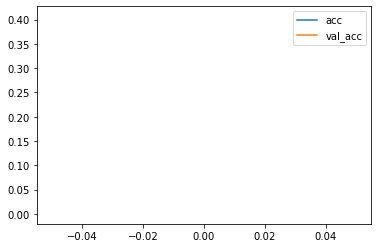

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

 

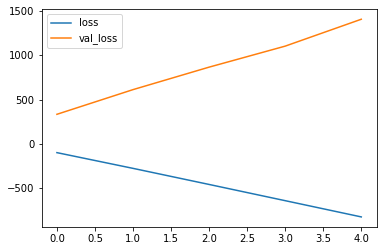

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [57]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence = "@ElonPunkNft @pungogh @ElonPunkPixel ðŸ† WhiteList Winners:@ionutroghina,@GypsyMeta,@NFT_n00dlez,@SatoshiNFTart,@olivierpips,@RonAlfred13,@metadesign30,@mickymoonshiner,@nicolaimaa"
predict_sentiment(test_sentence1)

 

1/1 [==============================] - 0s 57ms/step
Predicted label:  Community
